# Tax loss harvesting in Japan: is it worthwhile?

Imagine a situation where you invested ¥200,000 into two stocks, ¥100,000 in stock A and ¥100,000 in stock B. Stock A rises in price and you manage to sell it for ¥120,000, making a gain of ¥20,000. You invested via a tokutei tax withholding account, so it withheld ¥4,063 from the ¥20,000 gains to pay capital gains tax (20.315% rate).

Later in the year stock B is not doing so well and it is sitting at ¥80,000. Does it make sense to sell stock B so its loss offsets the capital gain on stock A, and then to re-buy stock B immediately?

Let's consider one example for how things could play out. 

Text(0, 0.5, 'Value (¥)')

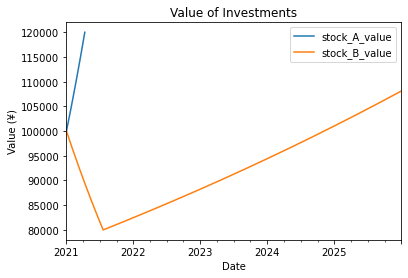

In [1]:
import numpy as np
import pandas as pd

start_date = '2021-01-01'
end_date = '2025-12-31'

# create a dataframe running for 5 years
df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date))

# purchase stock A at the start of the investment period for ¥100,000
# over 100 days this grows to ¥120,000
df['stock_A_value'] = [100000*1.2**(i/100) for i in range(0,101)] + [np.nan]*(len(df)-101)

# purchase stock B at the start of the investment period for ¥100,000
# this drops over 200 days to ¥80,000, then starts to rise in value with 7% annual growth rate
df['stock_B_value'] = [100000*0.8**(i/200) for i in range(0,201)] + [80000*1.07**(i/365.25) for i in range(1,len(df)-200)]

# plot what we have so far
ax = df.plot(title='Value of Investments')
ax.set_xlabel('Date')
ax.set_ylabel('Value (¥)')

This graph shows the value of the two investments under these assumptions. You first purchase both stocks on Jan 1, 2021. You sell stock A after 100 days for a gross gain of ¥20,000, and after 200 days stock B is ¥20,000 down on where it started. Stock B then starts growing with an annualized 7% growth rate.

Now consider three scenarios:

- Scenario 1: You do nothing now and sell stock B sometime after 2021.
- Scenario 2: You sell stock B at 200 days, then reinvest the proceeds of the sale back into stock B (¥80,000 re-invested).
- Scenario 3: You sell stock B at 200 days, then reinvest the proceeds and the capital gains tax refund on stock A back into stock B (¥84,063 re-invested).

Assume the price of stock B does not change between when you sell and re-buy it under scenarios 1 and 2. Also assume you just keep the net proceeds from the sale of stock A at 100 days in cash (¥115,937). You could do other things with this money, but the outcome will be same whichever of the three scenarios. Let's also ignore dividends.

For each scenario, let's calculate how much capital gains tax you pay and how much profit/loss you would end up with upon selling stock B in the future.

In [2]:
df2 = pd.DataFrame(index=pd.date_range(start='2022-01-01', end=end_date))

cgt_rate = 0.20315
stock_A_gross_profit = df['stock_A_value'][100]-df['stock_A_value'][0]
stock_A_cgt = stock_A_gross_profit*cgt_rate
stock_A_net_profit = stock_A_gross_profit-stock_A_cgt

# Scenario 1
df2['scn1_stock_B_value'] = df['stock_B_value']
# Calculate the capital gains tax from the sale of stock B and total capital gains tax (inc. stock A tax)
df2['scn1_stock_B_cgt'] = ((df2['scn1_stock_B_value']-df['stock_B_value'][0])*cgt_rate).clip(lower=0)
df2['scn1_cgt_total'] = stock_A_cgt + df2['scn1_stock_B_cgt']   
# Calculate your overall profit/loss
df2['scn1_pl'] = df2['scn1_stock_B_value']-df['stock_B_value'][0]-df2['scn1_stock_B_cgt']+stock_A_net_profit

# Scenario 2
df2['scn2_stock_B_value'] = df['stock_B_value']
# Calculate the capital gains tax from sale of stock B, which is the total capital gains tax
df2['scn2_stock_B_cgt'] = (df2['scn2_stock_B_value']-df['stock_B_value'][200])*cgt_rate
# Calculate your overall profit/loss
df2['scn2_pl'] = df2['scn2_stock_B_value']-df['stock_B_value'][0]-df2['scn2_stock_B_cgt']+stock_A_net_profit+stock_A_cgt

# Scenario 3: Reinvest the capital gains tax refund on stock A into stock B
# Calculate the growth of the stock B investment (¥84,063 investment at 200 days)
df2['scn3_stock_B_value'] = (df['stock_B_value'][200]+stock_A_cgt)/df['stock_B_value'][200]*df['stock_B_value']
# Calculate the capital gains tax from sale of stock B, which is the total capital gains tax
df2['scn3_stock_B_cgt'] = (df2['scn3_stock_B_value']-df['stock_B_value'][200]-stock_A_cgt)*cgt_rate
# Calculate the net proceeds from the sale of stock B and the capital gains tax refund on stock A
df2['scn3_pl'] = df2['scn3_stock_B_value']-df['stock_B_value'][0]-df2['scn3_stock_B_cgt']+stock_A_net_profit

df2.head()

,scn1_stock_B_value,scn1_stock_B_cgt,scn1_cgt_total,scn1_pl,scn2_stock_B_value,scn2_stock_B_cgt,scn2_pl,scn3_stock_B_value,scn3_stock_B_cgt,scn3_pl
2022-01-01,82482.909684,0.0,4063.0,-1580.090316,82482.909684,504.403102,1978.506581,86672.010459,530.020475,2078.989984
2022-01-02,82498.190174,0.0,4063.0,-1564.809826,82498.190174,507.507334,1990.682840,86688.067007,533.282363,2091.784645
2022-01-03,82513.473495,0.0,4063.0,-1549.526505,82513.473495,510.612141,2002.861355,86704.126530,536.544855,2104.581676
2022-01-04,82528.759648,0.0,4063.0,-1534.240352,82528.759648,513.717522,2015.042125,86720.189028,539.807951,2117.381077
2022-01-05,82544.048632,0.0,4063.0,-1518.951368,82544.048632,516.823480,2027.225152,86736.254502,543.071652,2130.182850


The below graph shows is the total capital gains tax you will pay in each scenario:

Text(0, 0.5, 'Total capital gains tax (¥)')

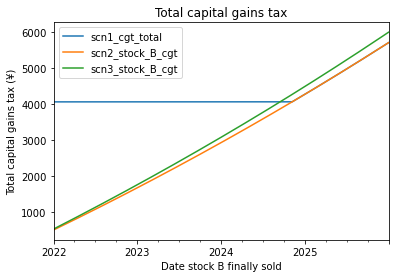

In [3]:
ax = df2.plot(y=['scn1_cgt_total', 'scn2_stock_B_cgt', 'scn3_stock_B_cgt'], title='Total capital gains tax')
ax.set_xlabel('Date stock B finally sold')
ax.set_ylabel('Total capital gains tax (¥)')

First focus on the blue scenario 1 line. The blue line is flat until late 2024. This flat section just represents capital gains tax from stock A. There is no capital gains tax on stock B for this period as it has not recovered to the original ¥100,000 purchase price. From late 2024, stock B rises above this original purchase price and the blue line starts to rise.

Now look at the orange scenario 2 line. There is no capital gains tax on stock A - this has been refunded. The orange line is just showing the capital gains tax on stock B, which increases steadily after you re-bought it at ¥80,000. Until late 2024, you end up paying less capital gains tax by tax loss harvesting (scenario 2) than by doing nothing (scenario 1). The total capital gains tax paid under both scenarios 1 and 2 is the same from late 2024 onwards.

The green line for scenario 3 is slightly higher than scenario 2 for all dates. This is because you have reinvested more back into stock B this time (¥84,063) by including the stock A capital gains tax refund in the reinvestment.

Let's now examine the overall profit/loss you make in each scenario:

Text(0, 0.5, 'Profit/loss (¥)')

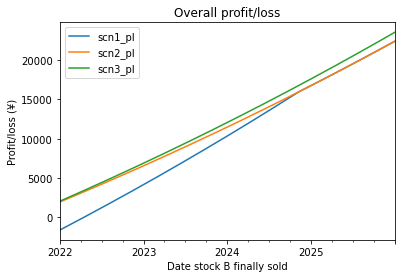

In [4]:
ax = df2.plot(y=['scn1_pl', 'scn2_pl', 'scn3_pl'], title='Overall profit/loss')
ax.set_xlabel('Date stock B finally sold')
ax.set_ylabel('Profit/loss (¥)')

This graph demonstrates that there are two ways you can benefit from tax loss harvesting:

1. You pay less capital gains tax overall if you end up selling stock B before it recovers to its original purchase price, meaning you end up with more money.
2. You can reinvest the stock A capital gains tax refund and benefit from its growth in the market.

There is also a third possible benefit I mentioned on the Retire Japan [thread](https://www.retirejapan.com/forum/viewtopic.php?f=8&t=1494): you could use tax loss harvesting as an opportunity not to reinvest in stock B, but to re-balance your portfolio or to switch to a better investment (one with lower fees, greater expected returns, easier tax or dividend handling, etc.)

Final notes:

- It is quite possible there is a mistake in the above calculations. If you find one, please let me know.
- Remember the investment rule of thumb: it is generally better to pay your taxes as late as you are legally allowed to.
- Other scenarios/assumptions may give different answers.
- There is no substitute for professional advice.
- This document is not professional advice.
